In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

def read_excel_file(file_path):
    """
    Read an Excel file and return a pandas DataFrame.

    Parameters:
    file_path (str): The path to the Excel file.

    Returns:
    pandas.DataFrame: The DataFrame containing the data from the Excel file.

    Raises:
    Exception: If there is an error reading the Excel file.
    """
    try:
        df = pd.read_excel(file_path)
        return df
    except Exception as e:
        print(f"Error reading Excel file: {e}")
        return None
        
df = read_excel_file("DATA/Info_BDApnea_QuironMalaga.xlsx")

# Display the column names
print(df.columns)

# Display the first few rows of the DataFrame
df.head()

# print amount of rows
print(len(df))

# print amount of columns
print(len(df.columns))

total_patients = 683 # obtained from the excel file 

Index(['Patient', 'Comentarios', 'Audios tumbado', 'Fotos', 'Audio fs KHz',
       'Gender', 'EPWORTH', 'IAH', 'IAH Supino', 'IAH Lateral', 'Peso',
       'Talla', 'IMC', 'Edad', 'PerCervical', 'Fumador', 'Roncador',
       'Enfermedades', 'Sala/Ruidos', 'Imagen', 'Dialecto', 'DIST EXT OJOS',
       'DIST BARB-LOB', 'Cansancio', 'Concentrarse', 'PerdRespNoche', 'HiperT',
       'EstHOSP'],
      dtype='object')
873
28


In [135]:
# Create a new DataFrame with only the first 683 rows
df = df.iloc[:total_patients]

# display the last few rows of the new DataFrame
df.tail()

,Patient,Comentarios,Audios tumbado,Fotos,Audio fs KHz,Gender,EPWORTH,IAH,IAH Supino,IAH Lateral,...,Sala/Ruidos,Imagen,Dialecto,DIST EXT OJOS,DIST BARB-LOB,Cansancio,Concentrarse,PerdRespNoche,HiperT,EstHOSP
678,P0679,QMH688(patient0753) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,9.2,15.9,7.3,...,443,nd,andaluz/Málaga,10.860,15.019,no,no,1,1.0,1.0
679,P0680,QMH689(patient0754),NO_UNAREP,si,55/16,hombre,NaN,52.2,53.4,50.3,...,442,nd,Mezcla,10.268,14.383,si,no,1,0.0,0.0
680,P0681,QMH690(patient0755) usa CPAP,NO_UNAREP,si,55/16,hombre,NaN,NaN,NO disponible,NaN,...,434,nd,andaluz/Málaga,9.181,14.35,no,no,1,1.0,0.0
681,P0682,QMH691(patient0756),NO_UNAREP,si,55/16,mujer,NaN,5.4,NaN,este sobre todo,...,436,nd,andaluz/Málaga,8.543,11.956,si,si,1,0.0,1.0
682,P0683,QMH692(patient0757) FOTOS BOCA y RESPIRACIONES...,NO_UNAREP,si,55/16,mujer,NaN,31.9,NaN,NaN,...,422,nd,andaluz/Málaga,8.535,13.517,no,no,1,1.0,NaN


### Check the amount of NaN values in the feature columns

In [136]:
# Replace -1 with NaN in the 'IMC' column
df['IMC'].replace(-1, np.nan, inplace=True)

# Replace 'ns' with NaN in the 'Roncador' and 'Fumador' columns
df['Roncador'].replace('ns', np.nan, inplace=True)
df['Fumador'].replace('ns', np.nan, inplace=True)

# Display the unique values in the modified columns to confirm the changes
print(df['IMC'].unique())
print(df['Roncador'].unique())
print(df['Fumador'].unique())

[nan]
[nan 'si' 'no' 'poco' 'si´(protesis boca para dormir)' 'no con CPAD'
 'si sin CPAP' 'CPAP']
[nan 'si' 'no' 'antiguo' 'poco' 'si (poco)']


Columns with NaN values:
EPWORTH          628
IAH               34
IAH Supino        95
IAH Lateral      158
Peso               5
Talla              6
IMC              683
Edad               5
PerCervical        5
Fumador           19
Roncador         180
Enfermedades       5
Sala/Ruidos        3
Imagen             3
Dialecto           3
DIST EXT OJOS    378
DIST BARB-LOB    378
Cansancio        504
Concentrarse     504
PerdRespNoche    658
HiperT           660
EstHOSP          663
dtype: int64
Rows with NaN values:
    Patient                                        Comentarios Audios tumbado  \
0     P0001  es el Patient0002 (fotos) 3 (sentado) y 4 (tum...             si   
1     P0002          Es el Patient0006 (sentado) y 7 (tumbado)             si   
2     P0003                                  Patient 8, 9 y 10             si   
3     P0004                                    Patient 13 y 14     si_codigos   
4     P0005                       Patient0015 los códigos QMH5     si_cod

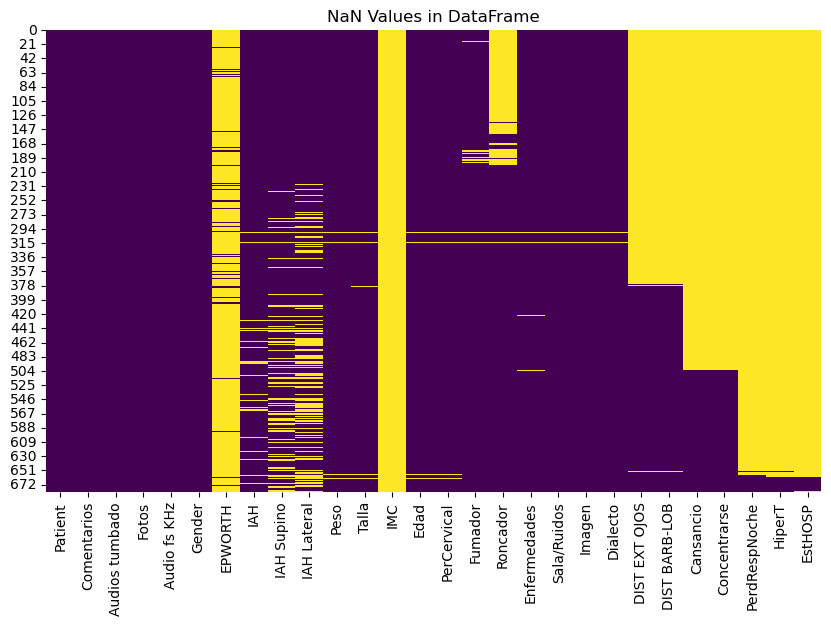

In [137]:
def explore_nan_values(df):
    """
    Explore NaN values in a DataFrame and visualize them.

    Parameters:
    df (pandas.DataFrame): The DataFrame to explore NaN values.

    Returns:
    None
    """
    # Check for NaN values in the DataFrame
    nan_values = df.isnull().sum()

    # Display the columns with NaN values
    print("Columns with NaN values:")
    print(nan_values[nan_values > 0])

    # Display the rows with NaN values
    print("Rows with NaN values:")
    print(df[df.isnull().any(axis=1)])

    # Visualize NaN values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
    plt.title("NaN Values in DataFrame")
    plt.show()

explore_nan_values(df)

In [138]:
# Check unique values in the 'Fumador' column and their counts
fumador_counts = df['Fumador'].value_counts()
print("Unique values in 'Fumador' column and their counts:")
print(fumador_counts)

# Check unique values in the 'Roncador' column and their counts
roncador_counts = df['Roncador'].value_counts()
print("Unique values in 'Roncador' column and their counts:")
print(roncador_counts)

# ns = no sabe (don't know)

# Check the number of NaN values in the 'EPWORTH' column
epworth_nan_count = df['EPWORTH'].isna().sum()
print(f"Number of NaN values in 'EPWORTH' column: {epworth_nan_count}")

Unique values in 'Fumador' column and their counts:
Fumador
no           373
si           165
antiguo      119
poco           6
si (poco)      1
Name: count, dtype: int64
Unique values in 'Roncador' column and their counts:
Roncador
si                                466
no                                 18
CPAP                               12
no con CPAD                         4
poco                                1
si´(protesis boca para dormir)      1
si sin CPAP                         1
Name: count, dtype: int64
Number of NaN values in 'EPWORTH' column: 628


### Extract only the desired columns from the DataFrame and change the names

In [139]:
def rename_columns(df, column_mapping):
    """
    Rename the columns of a DataFrame based on a column mapping.

    Parameters:
    df (pandas.DataFrame): The DataFrame to rename columns.
    column_mapping (dict): A dictionary mapping old column names to new column names.

    Returns:
    pandas.DataFrame: The DataFrame with renamed columns.
    """
    return df.rename(columns=column_mapping)

column_mapping = {
    'Patient': 'Patient',
    'Gender': 'Gender',
    'IAH': 'AHI',
    'Peso': 'Weight',
    'Edad': 'Age',
    'Talla': 'Height',
    'PerCervical': 'Cervical',
}

df = rename_columns(df, column_mapping)[list(column_mapping.values())]

# Display the column names
print(df.columns)

# Display the first few rows of the DataFrame 
print(df.head())

# Display the shape of the DataFrame
print(df.shape)

# Display the data types of the columns
print(df.dtypes)


Index(['Patient', 'Gender', 'AHI', 'Weight', 'Age', 'Height', 'Cervical'], dtype='object')
  Patient  Gender   AHI Weight   Age  Height  Cervical
0   P0001  hombre  71.0     82  39.0   168.0      -1.0
1   P0002  hombre  29.6    119  56.0   174.0      48.0
2   P0003  hombre  56.0     -1  46.0    -1.0      43.0
3   P0004  hombre  19.7     78  39.0   168.0      42.0
4   P0005  hombre   9.0     80  32.0   173.0      40.0
(683, 7)
Patient      object
Gender       object
AHI         float64
Weight       object
Age         float64
Height      float64
Cervical    float64
dtype: object


### Check for data types

In [140]:
# print unique values of the weight column 
print(df['Weight'].unique())

# Assuming df is your DataFrame and 'Weight' is the column you're interested in
df['Weight_numeric'] = pd.to_numeric(df['Weight'], errors='coerce')

# Find rows where 'Weight_numeric' is NaN, indicating a non-numeric value in the 'Weight' column
non_numeric_rows = df[df['Weight_numeric'].isna()]

# Display these rows
# print(non_numeric_rows)

# Drop the 'Weight_numeric' column if you no longer need it
df.drop('Weight_numeric', axis=1, inplace=True)

# Coerce 'Weight' to be numeric or NaN
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Display the data types of the columns to confirm the change
print(df.dtypes)

# Display unique values in the 'Weight' column
print(df['Weight'].unique())

[82 119 -1 78 80 109 86 145 72 90 69 50 55 95 88 65 89 63 113 60 107 70 77
 100 74 93 105 68 91 84 110 115 83 125 92 67 97 98 75 94 85 87 106 81 76
 71 73 66 101 52 102 120 140 161 96 108 79 121 104 64 62 162 111 118 45 99
 130 59 103 165 53 58 117 nan 56 54 133 57 128 112 149 135 'no se saben'
 132 114 61 131 123 122 116 'No quiere saberlo' 160 48]
Patient      object
Gender       object
AHI         float64
Weight      float64
Age         float64
Height      float64
Cervical    float64
dtype: object
[ 82. 119.  -1.  78.  80. 109.  86. 145.  72.  90.  69.  50.  55.  95.
  88.  65.  89.  63. 113.  60. 107.  70.  77. 100.  74.  93. 105.  68.
  91.  84. 110. 115.  83. 125.  92.  67.  97.  98.  75.  94.  85.  87.
 106.  81.  76.  71.  73.  66. 101.  52. 102. 120. 140. 161.  96. 108.
  79. 121. 104.  64.  62. 162. 111. 118.  45.  99. 130.  59. 103. 165.
  53.  58. 117.  nan  56.  54. 133.  57. 128. 112. 149. 135. 132. 114.
  61. 131. 123. 122. 116. 160.  48.]


In [141]:
# check types of the dataframe
print(df.dtypes)

# Change to categorical dtype is done to be more memory efficient
# Change the 'Gender' column to categorical
df['Gender'] = df['Gender'].astype('category')

# Change the 'Patient' column to categorical
df['Patient'] = df['Patient'].astype('category')

# print the head of the dataframe
print(df.head())

# Display the data types of the columns in the cleaned DataFrame
print(df.dtypes)


Patient      object
Gender       object
AHI         float64
Weight      float64
Age         float64
Height      float64
Cervical    float64
dtype: object
  Patient  Gender   AHI  Weight   Age  Height  Cervical
0   P0001  hombre  71.0    82.0  39.0   168.0      -1.0
1   P0002  hombre  29.6   119.0  56.0   174.0      48.0
2   P0003  hombre  56.0    -1.0  46.0    -1.0      43.0
3   P0004  hombre  19.7    78.0  39.0   168.0      42.0
4   P0005  hombre   9.0    80.0  32.0   173.0      40.0
Patient     category
Gender      category
AHI          float64
Weight       float64
Age          float64
Height       float64
Cervical     float64
dtype: object


In [142]:
### test
# Create a DataFrame with an object column
df_test = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female']
})

# Check memory usage before conversion
print(df_test.memory_usage(deep=True))

# Convert the 'Gender' column to categorical
df_test['Gender'] = df_test['Gender'].astype('category')

# Check memory usage after conversion
print(df_test.memory_usage(deep=True))

Index     128
Gender    311
dtype: int64
Index     128
Gender    237
dtype: int64


### Check for NaN values 

Columns with NaN values:
AHI         34
Weight       8
Age          8
Height       7
Cervical    12
dtype: int64
Rows with NaN values:
    Patient  Gender   AHI  Weight   Age  Height  Cervical
0     P0001  hombre  71.0    82.0  39.0   168.0       NaN
2     P0003  hombre  56.0     NaN  46.0     NaN      43.0
10    P0011  hombre  14.2    90.0  29.0   182.0       NaN
11    P0012  hombre  10.0    69.0  48.0   169.0       NaN
78    P0079  hombre   9.0    81.0  50.0   175.0       NaN
178   P0179  hombre  45.0   106.0   NaN   184.0       NaN
179   P0180  hombre   5.3    83.0   NaN   175.0       NaN
180   P0181  hombre   8.4    71.0   NaN   170.0       NaN
260   P0261  hombre   NaN     NaN   NaN     NaN       NaN
299   P0300  hombre   NaN     NaN   NaN     NaN       NaN
314   P0315   mujer   NaN     NaN   NaN     NaN       NaN
331   P0332  hombre   NaN   100.0  52.0   178.0      42.0
379   P0380   mujer   0.0     NaN  71.0     NaN      40.0
429   P0430  hombre   NaN   131.0  49.0   175.0      

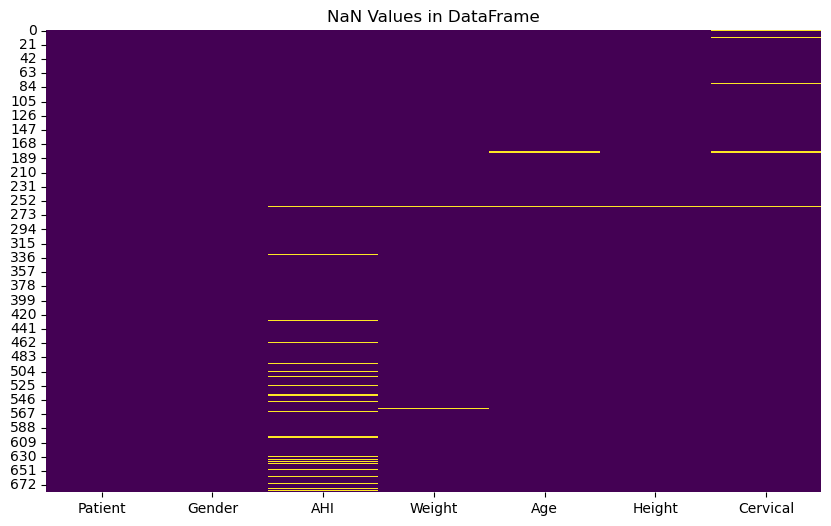

In [150]:
# Replace -1 with NaN in the entire DataFrame
df.replace(-1, np.nan, inplace=True)

# Explore NaN values in the DataFrame
explore_nan_values(df)

### Create linear regression model to predict the AHI value for NaN replacement


In [180]:
# Take a deep copy of the DataFrame
df_copy = df.copy(deep=True)

# Calculate BMI using the formula: BMI = Weight (kg) / (Height (m)^2)
df_copy['BMI'] = df_copy['Weight'] / (df_copy['Height'] / 100) ** 2

# Perform one hot encoding on the 'Gender' column
df_copy['Gender'] = df_copy['Gender'].apply(lambda x: 1 if x == 'hombre' else 0)

print(df_copy.head())

  Patient Gender   AHI  Weight   Age  Height  Cervical        BMI
0   P0001      1  71.0    82.0  39.0   168.0       NaN  29.053288
1   P0002      1  29.6   119.0  56.0   174.0      48.0  39.305060
2   P0003      1  56.0     NaN  46.0     NaN      43.0        NaN
3   P0004      1  19.7    78.0  39.0   168.0      42.0  27.636054
4   P0005      1   9.0    80.0  32.0   173.0      40.0  26.729927


Columns with NaN values:
AHI         34
Weight       8
Age          8
Height       7
Cervical    12
BMI          8
dtype: int64
Rows with NaN values:
    Patient Gender   AHI  Weight   Age  Height  Cervical        BMI
0     P0001      1  71.0    82.0  39.0   168.0       NaN  29.053288
2     P0003      1  56.0     NaN  46.0     NaN      43.0        NaN
10    P0011      1  14.2    90.0  29.0   182.0       NaN  27.170632
11    P0012      1  10.0    69.0  48.0   169.0       NaN  24.158818
78    P0079      1   9.0    81.0  50.0   175.0       NaN  26.448980
178   P0179      1  45.0   106.0   NaN   184.0       NaN  31.309074
179   P0180      1   5.3    83.0   NaN   175.0       NaN  27.102041
180   P0181      1   8.4    71.0   NaN   170.0       NaN  24.567474
260   P0261      1   NaN     NaN   NaN     NaN       NaN        NaN
299   P0300      1   NaN     NaN   NaN     NaN       NaN        NaN
314   P0315      0   NaN     NaN   NaN     NaN       NaN        NaN
331   P0332      1   NaN   100.0  

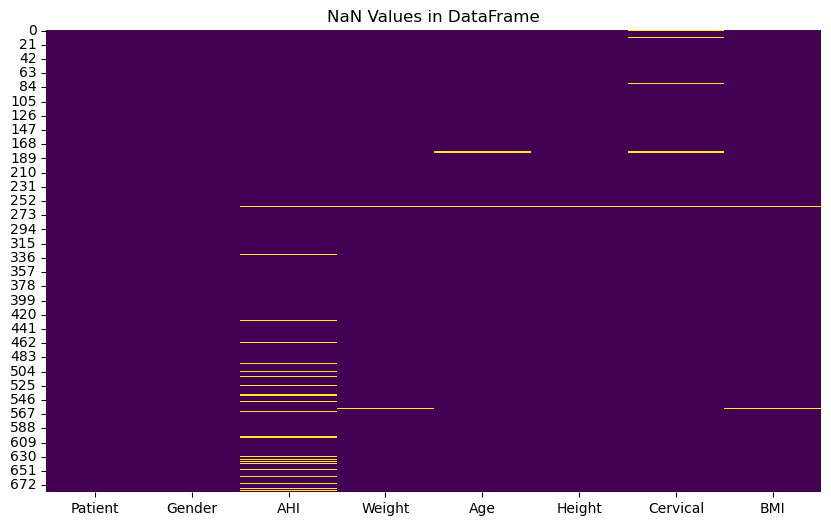

Amount of rows dropped:  46
(637, 8)
Columns with NaN values:
Series([], dtype: int64)
Rows with NaN values:
Empty DataFrame
Columns: [Patient, Gender, AHI, Weight, Age, Height, Cervical, BMI]
Index: []


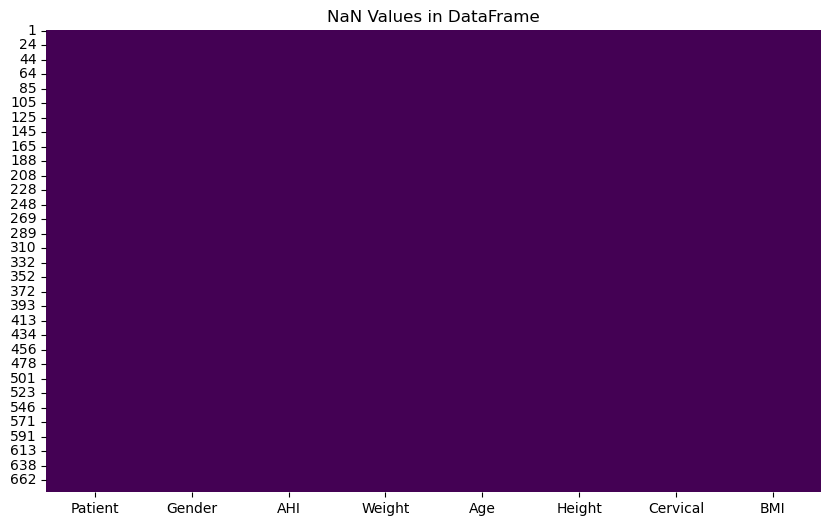

In [181]:
explore_nan_values(df_copy)

# Drop rows with NaN values
df_cleaned = df_copy.dropna()

# check how many rows have been dropped 
print("Amount of rows dropped: ", total_patients - df_cleaned.shape[0])

# Assuming df_cleaned is a slice from another DataFrame, ensure it's a copy
df_cleaned = df_cleaned.copy()

# Display the shape of the cleaned DataFrame
print(df_cleaned.shape)

# Explore NaN values in the cleaned DataFrame
explore_nan_values(df_cleaned)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
features = ['Gender', 'Age', 'Cervical', 'BMI']
target = 'AHI'

# Prepare the data
X = df_cleaned[features]
y = df_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
print(coefficients)

# Display the mean squared error and R-squared value
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

          Coefficient
Gender       0.059895
Age          0.160761
Cervical     1.462556
BMI          0.638651
Mean Squared Error: 242.96289927078345
R-squared: 0.2566138146563083


Columns with NaN values:
AHI    31
dtype: int64
Rows with NaN values:
    Patient Gender  AHI  Weight   Age  Height  Cervical        BMI
331   P0332      1  NaN   100.0  52.0   178.0      42.0  31.561672
429   P0430      1  NaN   131.0  49.0   175.0      45.0  42.775510
441   P0442      0  NaN    90.0  32.0   163.0      35.0  33.874064
444   P0445      1  NaN   120.0  48.0   165.0      46.0  44.077135
461   P0462      1  NaN    80.0  61.0   170.0      39.0  27.681661
469   P0470      1  NaN    78.0  31.0   189.0      36.0  21.835895
490   P0491      0  NaN   108.0  44.0   162.0      37.0  41.152263
492   P0493      1  NaN   100.0  57.0   183.0      41.0  29.860551
493   P0494      1  NaN    78.0  55.0   172.0      37.0  26.365603
504   P0505      1  NaN   103.0  55.0   185.0      43.0  30.094960
511   P0512      1  NaN    72.0  69.0   165.0      40.0  26.446281
525   P0526      1  NaN    82.0  41.0   173.0      42.0  27.398176
538   P0539      1  NaN    97.0  52.0   180.0      42.0  29

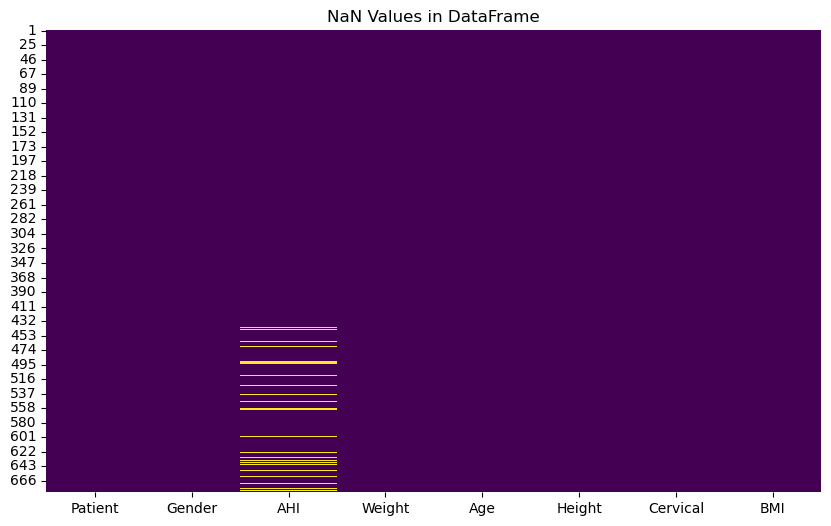

In [183]:
# Drop rows with NaN values in the 'Age', 'Cervical', or 'BMI' columns
df_copy.dropna(subset=['Age', 'Cervical', 'BMI'], inplace=True)

# Explore NaN values in the updated DataFrame
explore_nan_values(df_copy)

In [184]:
# Identify rows with NaN values in the AHI column
nan_ahi_rows = df_copy[df_copy['AHI'].isna()]

# Prepare the features for prediction
X_nan = nan_ahi_rows[features]

# Use the trained model to predict the AHI values for these rows
predicted_ahi = model.predict(X_nan)

# Display the predicted AHI values
print(predicted_ahi)

# Replace the NaN values with the predicted values
df_copy.loc[df_copy['AHI'].isna(), 'AHI'] = predicted_ahi

# Display the first few rows of the DataFrame to confirm the changes
print(df_copy.head())



[24.25788274 35.32499822 12.2216912  37.45807753 18.8390888   5.89519243
 21.72416247 22.51270838 14.10891019 25.26600428 20.79875455 19.83049321
 23.22109673 18.08274872  9.22990285 23.88627493 14.8940625  29.14047188
 23.58637336 17.67961287 42.19714776 10.39585645  9.49119911 12.3565892
  6.74460151 12.52085353 32.37138621 18.38346579 19.68806525 34.12414003
 24.90219561]
  Patient Gender   AHI  Weight   Age  Height  Cervical        BMI
1   P0002      1  29.6   119.0  56.0   174.0      48.0  39.305060
3   P0004      1  19.7    78.0  39.0   168.0      42.0  27.636054
4   P0005      1   9.0    80.0  32.0   173.0      40.0  26.729927
5   P0006      1   2.0   109.0  32.0   190.0      42.0  30.193906
6   P0007      1  34.0    86.0  39.0   169.0      42.0  30.110991


In [185]:
# print shape of the dataframe
print(df_copy.shape)

(668, 8)


### Create new Excel file from cleaned DataFrame

In [ ]:
# Write the cleaned DataFrame to a new Excel file
output_filepath = "DATA\OSA_DB_cleaned.xlsx"
df_copy.to_excel(output_filepath, index=False)